In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
health=pd.read_excel('diabeticdata.xlsx',sheet_name='Data')

In [3]:
health.head()

,patient_id,line1stdate,line2stdate,age,gender,agegroup,sbpn,dbpn,smokingstatus,Diseasecode,hospitalsize,durationofline1,line1drugcombination,line2drugcombination,line1drugs,line2drugs,curestatus
0,MB0001,2010-06-19,2010-07-19,26.746064,Male,20 – 34 years,109.0,63.0,Non-smoker,D1,More then 450 Number of beds,1,Unfixed,Unfixed,Drug2,Drug3+Drug2,0
1,MB0002,2014-12-19,2015-02-19,54.332649,Male,50 - 64 years,119.0,87.0,Current smoker,D6,1-50 number of beds,2,Unfixed,Unfixed,Drug3,Drug3+Drug2,1
2,MB0003,2011-07-20,2011-09-20,47.249829,Female,35 – 49 years,110.0,64.0,Non-smoker,D6,1-50 number of beds,2,Unfixed,Unfixed,Drug3,Drug3+Drug2,1
3,MB0004,2017-07-29,2017-08-05,63.028063,Female,50 - 64 years,140.0,84.0,NaN,D2,1-50 number of beds,0,Unfixed,Unfixed,Drug5,Drug1+Drug5,1
4,MB0005,2010-10-19,2014-03-19,48.082136,Female,35 – 49 years,157.0,96.0,Non-smoker,D6,More then 450 Number of beds,41,Unfixed,Unfixed,Drug3,Drug3+Drug2,0


In [4]:
health.shape

(1400, 17)

In [5]:
health.dtypes

patient_id                      object
line1stdate             datetime64[ns]
line2stdate             datetime64[ns]
age                            float64
gender                          object
agegroup                        object
sbpn                           float64
dbpn                           float64
smokingstatus                   object
Diseasecode                     object
hospitalsize                    object
durationofline1                  int64
line1drugcombination            object
line2drugcombination            object
line1drugs                      object
line2drugs                      object
curestatus                       int64
dtype: object

In [6]:
health.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1400.0,49.738660,10.190028,20.188912,43.056126,49.549624,56.488706,73.982204
sbpn,1037.0,124.205400,16.783520,71.000000,112.000000,123.000000,134.000000,193.000000
dbpn,1037.0,76.632594,11.570792,44.000000,68.000000,76.000000,84.000000,125.000000
durationofline1,1400.0,12.562143,15.502648,0.000000,2.000000,6.000000,18.000000,101.000000
curestatus,1400.0,0.410000,0.492009,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 17 columns):
patient_id              1400 non-null object
line1stdate             1400 non-null datetime64[ns]
line2stdate             1400 non-null datetime64[ns]
age                     1400 non-null float64
gender                  1400 non-null object
agegroup                1400 non-null object
sbpn                    1037 non-null float64
dbpn                    1037 non-null float64
smokingstatus           934 non-null object
Diseasecode             1400 non-null object
hospitalsize            1400 non-null object
durationofline1         1400 non-null int64
line1drugcombination    1400 non-null object
line2drugcombination    1400 non-null object
line1drugs              1400 non-null object
line2drugs              1400 non-null object
curestatus              1400 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(2), object(10)
memory usage: 186.0+ KB


In [8]:
health.isnull().sum()

patient_id                0
line1stdate               0
line2stdate               0
age                       0
gender                    0
agegroup                  0
sbpn                    363
dbpn                    363
smokingstatus           466
Diseasecode               0
hospitalsize              0
durationofline1           0
line1drugcombination      0
line2drugcombination      0
line1drugs                0
line2drugs                0
curestatus                0
dtype: int64

# Gender

In [9]:
print(health.gender.value_counts())

Male      801
Female    594
Malee       5
Name: gender, dtype: int64


In [10]:
health['gender'].replace('Malee','Male',inplace=True)

In [11]:
print(health.gender.value_counts())

Male      806
Female    594
Name: gender, dtype: int64


In [13]:
health['gender'].replace(['Male','Female'],[0,1],inplace=True)

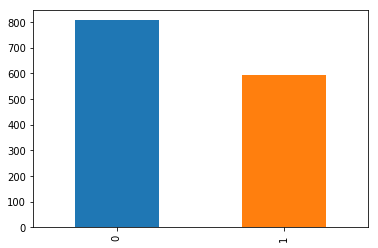

In [14]:
health.gender.value_counts().plot(kind='bar')

# Creating Dummies

In [23]:
from sklearn.preprocessing import LabelEncoder
labels=LabelEncoder()

In [24]:
health['agegroup']=labels.fit_transform(health['agegroup'])

In [25]:
health['Diseasecode']=labels.fit_transform(health['Diseasecode'])
health['hospitalsize']=labels.fit_transform(health['hospitalsize'])
health['line1drugcombination']=labels.fit_transform(health['line1drugcombination'])
health['line2drugcombination']=labels.fit_transform(health['line2drugcombination'])
health['line1drugs']=labels.fit_transform(health['line1drugs'])
health['line2drugs']=labels.fit_transform(health['line2drugs'])

# Smoking Status

In [15]:
print(health.smokingstatus.value_counts())

Non-smoker        741
Current smoker    193
Name: smokingstatus, dtype: int64


In [16]:
set(health['smokingstatus'])

{'Current smoker', 'Non-smoker', nan}

In [17]:
health.smokingstatus.replace(['Current smoker', 'Non-smoker'],[1,2],inplace=True)

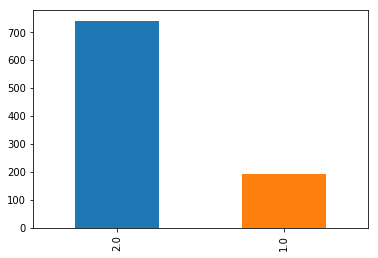

In [18]:
health.smokingstatus.value_counts().plot(kind='bar')

# Disease Code

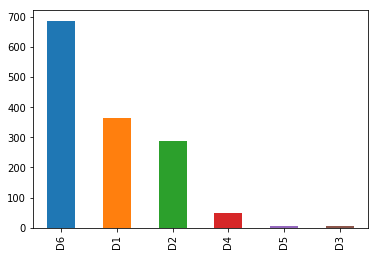

In [19]:
health.Diseasecode.value_counts().plot(kind='bar')

In [20]:
health.Diseasecode.value_counts()

D6    687
D1    363
D2    288
D4     48
D5      7
D3      7
Name: Diseasecode, dtype: int64

# Hospital Size

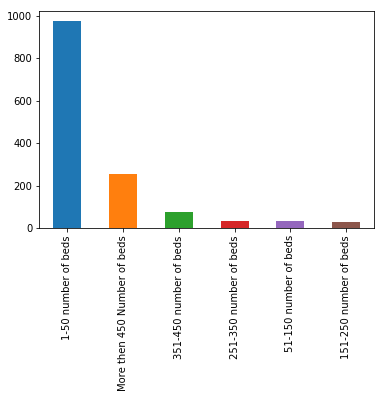

In [21]:
health.hospitalsize.value_counts().plot(kind='bar')

In [22]:
health.hospitalsize.value_counts()

1-50 number of beds             976
More then 450 Number of beds    253
351-450 number of beds           75
251-350 number of beds           35
51-150 number of beds            32
151-250 number of beds           29
Name: hospitalsize, dtype: int64

# Removing null values

In [26]:
health.dropna(axis=0,inplace=True)

In [27]:
health.shape

(928, 17)

In [37]:
health['diff']=health['line2stdate']-health['line1stdate']

In [38]:
health.head()

,patient_id,line1stdate,line2stdate,age,gender,agegroup,sbpn,dbpn,smokingstatus,Diseasecode,hospitalsize,durationofline1,line1drugcombination,line2drugcombination,line1drugs,line2drugs,curestatus,diff
0,MB0001,2010-06-19,2010-07-19,26.746064,0,0,109.0,63.0,2.0,0,5,1,1,1,5,24,0,30 days
1,MB0002,2014-12-19,2015-02-19,54.332649,0,2,119.0,87.0,1.0,5,0,2,1,1,6,24,1,62 days
2,MB0003,2011-07-20,2011-09-20,47.249829,1,1,110.0,64.0,2.0,5,0,2,1,1,6,24,1,62 days
4,MB0005,2010-10-19,2014-03-19,48.082136,1,1,157.0,96.0,2.0,5,5,41,1,1,6,24,0,1247 days
6,MB0007,2014-06-22,2015-11-29,56.175222,0,2,123.0,82.0,2.0,1,0,17,1,1,5,24,1,525 days


In [39]:
health['diff']=health['diff'].astype(str)

In [40]:
health.dtypes

patient_id                      object
line1stdate             datetime64[ns]
line2stdate             datetime64[ns]
age                            float64
gender                           int64
agegroup                         int32
sbpn                           float64
dbpn                           float64
smokingstatus                  float64
Diseasecode                      int32
hospitalsize                     int32
durationofline1                  int64
line1drugcombination             int32
line2drugcombination             int32
line1drugs                       int32
line2drugs                       int32
curestatus                       int64
diff                            object
dtype: object

# Model Fitting

Scaling the values

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

In [42]:
health_df=health.drop(labels='patient_id',axis=1)

In [43]:
health_features=health_df.drop(labels='curestatus',axis=1)

In [44]:
sc_x.fit(health_features.iloc[:,2:13])

C:\Users\Uday\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
health_features_1=sc_x.transform(health_features.iloc[:,2:13])

C:\Users\Uday\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [46]:
X=health_features_1
y=health_df['curestatus']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier (max_depth=1,criterion='',min_samples_split = 3, random_state = 0)
DTClassifier.fit (X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [48]:
predicted_labels = DTClassifier.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predicted_labels)
print(score)

0.6129032258064516


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predicted_labels))
print(classification_report(y_test,predicted_labels))

[[84 22]
 [50 30]]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       106
           1       0.58      0.38      0.45        80

   micro avg       0.61      0.61      0.61       186
   macro avg       0.60      0.58      0.58       186
weighted avg       0.61      0.61      0.59       186

